<a href="https://colab.research.google.com/github/safal207/hello-world/blob/master/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9_%D0%B8%D0%B7_%D0%BD%D0%B0%D0%B1%D0%BE%D1%80%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_MNIST%2C_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D1%81%D0%B2%D1%91%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D1%85_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Распознавание изображений из набора данных MNIST,  с помощью свёрточных нейронных сетей**
---


Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.



In [ ]:
from tensorflow.keras.datasets import mnist #Загружаем базу mnist


from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
# подключем диск
from google.colab import drive

%matplotlib inline

# Распознавание изображений из набора данных MNIST 


In [ ]:
#Загружаем MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape # обучающая выборка

(60000, 28, 28)

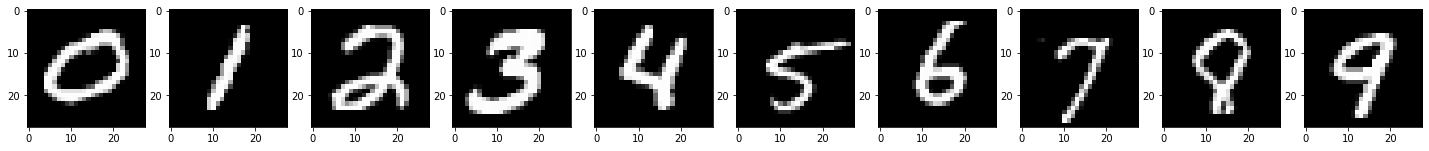

In [ ]:
# Выводим для примера картинки по кадому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) #Создаем полотно из 10 графиков

for i in range(10): #Проходим по классам от 0 до 9
  label_indexes = np.where(y_train==i)[0] #Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) #Случайным образом выбираем из списка индекс
  img = x_train[index] #Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img), cmap='gray') #Отображаем изображение i-ым графиков


plt.show() #Показываем изображения

In [ ]:
#Превращаем y_train и y_test сетей в формат one hot encoding
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

#Меняем формат данных MNIST
#Надо добавить в конце размерность 1
#Чтобы свёрточная сеть понимала, что это чёрно-белые данные
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
# Посмотрим форматы выборок перед обучением
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_4 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)              

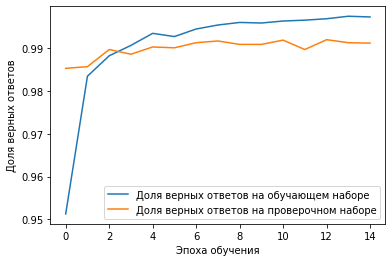

In [ ]:
#задаём batch_size
batch_size = 128 

#Создаем последовательную модель
model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(28, 28, 1)))
#Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(256, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()
#Обучаем сеть на данных mnist
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

#Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**Определение цифр из тестовой выборки**



In [ ]:
#Выбираем номер пример
n = 204
#Получаем выход сети на этом примере
prediction = model.predict(x_test)

#Выводим на экран результаты
print("Выход сети: ", prediction[n])
print("Распознанная цифра: ", np.argmax(prediction[n]))
print("Верный ответ: ", np.argmax(y_test[n]))

Выход сети:  [3.0427990e-11 1.0000000e+00 6.2327046e-09 2.7589079e-12 1.7886448e-09
 1.9342804e-10 1.5370611e-08 7.5281354e-09 2.6061386e-09 5.6491717e-10]
Распознанная цифра:  1
Верный ответ:  1


**Определение цифр на реальных фотографиях**

In [ ]:
!unzip '/content/drive/My Drive/Занятия/Апрельский курс 2020/Занятие №3/digits.zip' #Извлечем файлы из архива

In [ ]:
#Выводим для примера картинки по каждому классу

def change_contrast(img, factor): #Функция для увеличения контрастности 
    def contrast(pixel): #Функция для изменения цвета пикселя
    #Изменяем цвет каждого пикселя следующим образом. 
    #Если цвет пикслея в численной мере меньше 128, то значение будет уменьшаться 
    #на меру factor * (pixel - 128). Иначе - увеличиваться на эту меру
    #Очевидно, что чем сильнее цвет отличен от 128, тем сильнее он изменится
        return 128 + factor * (pixel - 128) 
    return img.point(contrast)

xTestReal = [] #Создаем x_test для загруженных картинок
yTestReal = [] #Создаем y_test для классов изображений

for i in range(10): #Проходим по классам от 0 до 9
  img_path = 'digits/' + str(i) + '.png' #Определяем имя изображения
  #Загружаем изображение, изменяя его размер на размер входного массива нейросети
  #Другими словами, подгоняем изображение к размеру картинок, на которых обучалась сеть
  #Указываем grayscale=True для того, чтобы цвет пиксяля задавался одним числом
  img = image.load_img(img_path, grayscale=True, target_size=(28, 28))
  img1 = change_contrast(img, factor=5.0) #Увеличиваем контрастность изображения
  xTestReal.append(255 - np.asarray(img1)) #Инвертируем изображение и добавляем в выборку
  yTestReal.append(i) #Добавляем в y_train номера классов

xTestReal = np.array(xTestReal) #Преобразуем в Numpy array
yTestReal = np.array(yTestReal) #Преобразуем в Numpy array

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


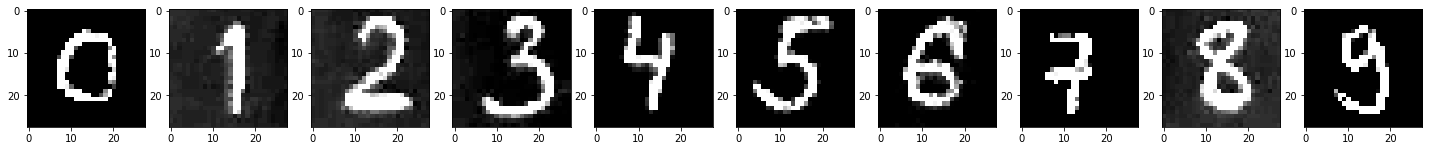

In [ ]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) #Создаем полотно из 10 графиков
for i in range(10): #Проходим по классам от 0 до 9
  axs[i].imshow(Image.fromarray(xTestReal[i]), cmap='gray') #Конвертируем изображение в черно-белый формат и отображаем i-ым графиков

plt.show() #Показываем изображения

In [ ]:
#Меняем формат данных, как делали это с выборкой MNIST
xTestReal = xTestReal.reshape(xTestReal.shape[0], 28, 28, 1)

#Результ распознования цифр на тестовой выборке

In [ ]:
prediction = model.predict(xTestReal) #Классифицируем каждое изображение
for i in range(10): #Проходим по картинкам
  #Вводим результаты на экран
  print("Распознанный образ:", np.argmax(prediction[i]), '. Верный ответ', yTestReal[i])

Распознанный образ: 0 . Верный ответ 0
Распознанный образ: 1 . Верный ответ 1
Распознанный образ: 2 . Верный ответ 2
Распознанный образ: 3 . Верный ответ 3
Распознанный образ: 4 . Верный ответ 4
Распознанный образ: 5 . Верный ответ 5
Распознанный образ: 6 . Верный ответ 6
Распознанный образ: 7 . Верный ответ 7
Распознанный образ: 8 . Верный ответ 8
Распознанный образ: 9 . Верный ответ 9
